In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape


(10000, 28, 28)

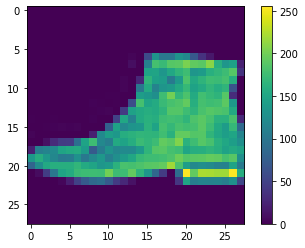

In [12]:
plt.figure()
plt.imshow(train_images[1700])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

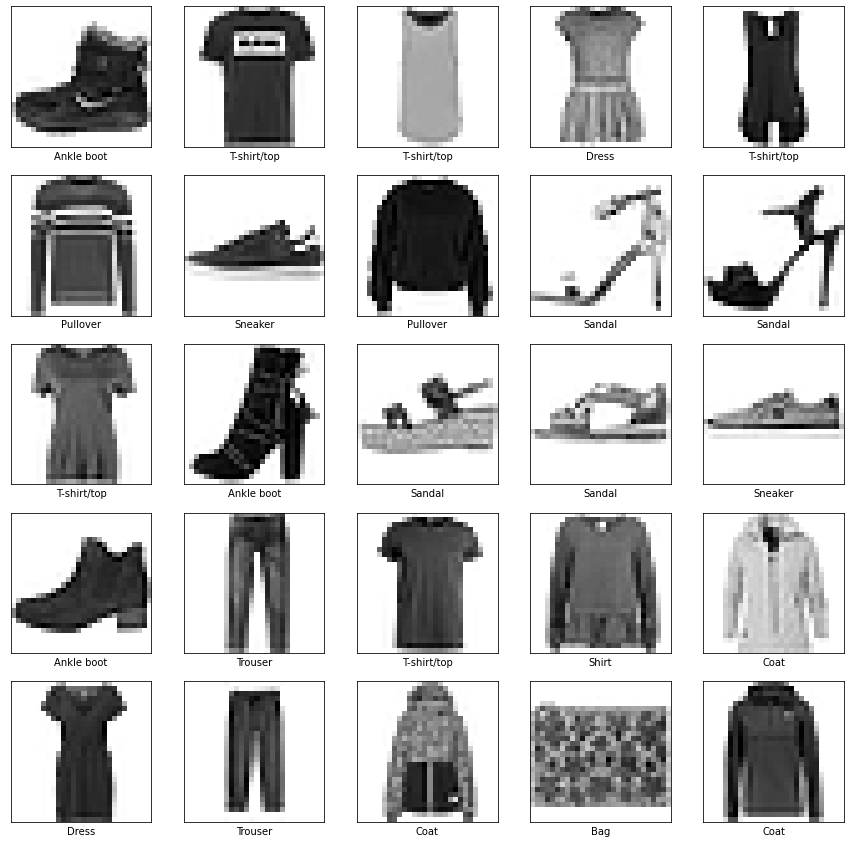

In [21]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5011 - accuracy: 0.8243
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3728 - accuracy: 0.8653
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3357 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8855
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.8919
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8967
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2662 - accuracy: 0.9009
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2544 - accuracy: 0.9049
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2444 - accuracy: 0.9088
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3592 - accuracy: 0.8833 - 774ms/epoch - 2ms/step

Test accuracy: 0.8833000063896179


In [26]:
predictions = model.predict(test_images)


313/313 [==============================] - 2s 4ms/step


In [27]:
predictions[0]


array([2.2701953e-11, 5.3148228e-18, 8.1085675e-16, 9.2548321e-13,
       5.6857997e-15, 3.2855562e-05, 4.1287340e-10, 5.1345192e-03,
       1.7807861e-14, 9.9483258e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])


9

In [29]:
test_labels[0]


9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

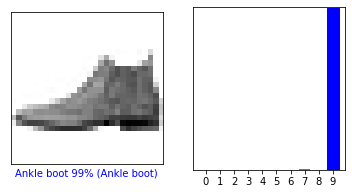

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

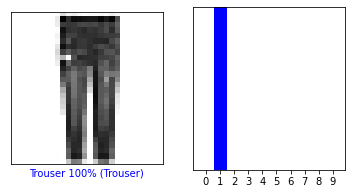

In [40]:
i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

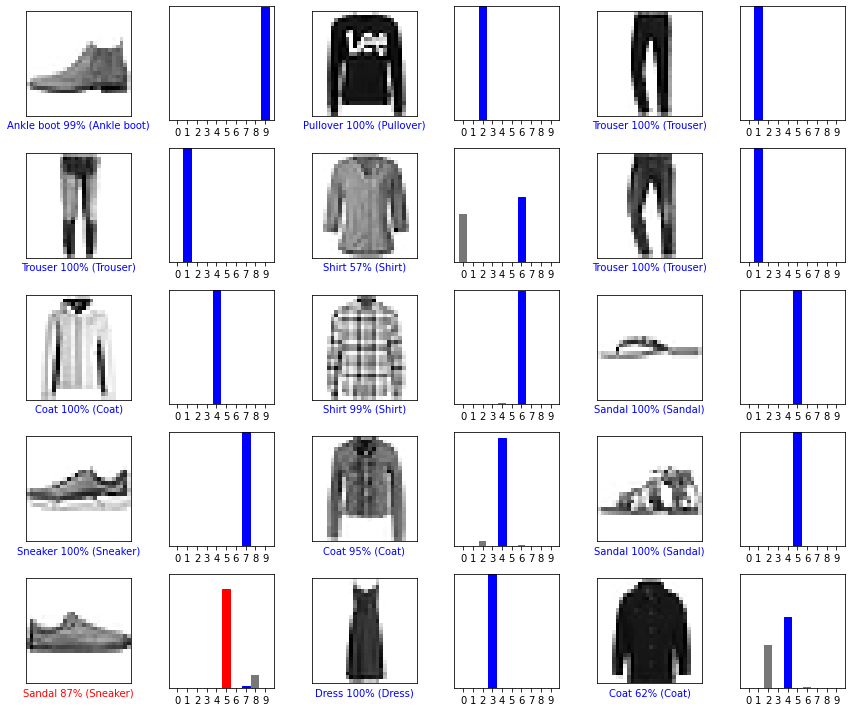

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()